<a href="https://colab.research.google.com/github/zeraimundo/IP_Exercicio_05042021/blob/main/Jos%C3%A9_Raimundo_Bezerra_de_Carvalho_ATIVIDADE_Tratamento_de_Exce%C3%A7%C3%A3o_Plataforma_Streaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Programação e Estrutura de Dados</h1>

<b><h2>1a Atividade Avaliativa: Tratamento de Exceções</h2></b>
<h3>Pontuação: 30 pontos</h3>

#Introdução

Nesta tarefa, trabalharemos com o mesmo cenário que está sendo utilizado para apresentar os recursos e sintaxe de Python para a programação orientada a objeto.

Porém, nosso foco nesta tarefa é praticar o aprendizado com **Tratamento de Exceção**.

Vamos recordar o cenário da **Plataforma de Avaliação de Filmes** que já é conhecido em nossas aulas, haja vista que estamos evoluindo este código. Na última Seção intitulada **Requisitos da Tarefa**, você saberá exatamente o que está sendo pedido nesta atividade.

Utilize o chat para tirar dúvidas. A disciplina também conta com monitoria. Aproveite ao máximo o suporte que você tem disponível para concluir a tarefa com sucesso.

No caso de **detecção de códigos copiados**, quem enviar a tarefa primeiro terá o crédito. As demais cópias que aparecerem em sequência terão a pontuação anulada.

**Problema**:

Imaginemos um pequeno programinha em que temos a disposição uma lista de filmes que foram teoricamente assistidos e que desejamos avaliá-lo em uma plataforma de streaming. Um filme possui seu próprio conjunto de informações tais como id, titulo, nota (1 a 5) e seu preço. O preço do filme corresponde ao valor que um usuário terá que pagar para poder assisti-lo. O valor de "locação" do filme pode ser alterado

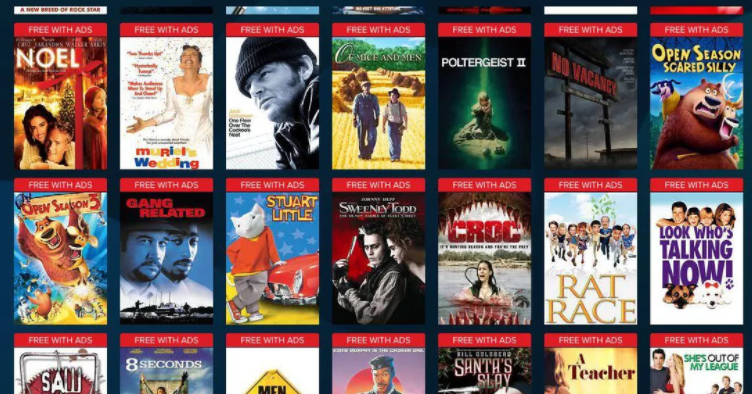

#Classes do Problema

A seguir, você encontrará a implementação das classes `Filme`, `PlataformaStreaming` e o programa principal que utiliza objetos dessas classes.

##3.1 Filme

In [ ]:
class Filme:
    def __init__(self, id, titulo, preco):  # construtor
        self.__id = id
        self.__titulo = titulo
        self.__nota = None
        self.__preco = preco

    # método "get" para o id
    @property
    def id(self):
        return self.__id

    @property
    def titulo(self):
        return self.__titulo

    @property
    def nota(self):
        return self.__nota

    @property
    def preco(self):
        return self.__preco


    # criar um método "set"
    @id.setter
    def id(self, novoId):
        self.__id = novoId

    @titulo.setter
    def titulo(self, novoTitulo):
        self.__titulo = novoTitulo

    @preco.setter
    def preco(self, novopreco):
        self.reajustarPreco(novopreco)

    def reajustarPreco(self, novopreco):
        assert novopreco >= 0 and novopreco <= 99.99, "Valor inválido, digite um Valor entre 0 e 99,99"
        self.__preco = novopreco

    def avaliar(self, nota):
        # nota de 1...5
        if nota > 5:
            self.__nota = 5
        elif nota < 0:
            self.__nota = 0
        else:
            self.__nota = nota

    def __str__(self):
        return f'{self.__id} - {self.__titulo} - nota: {self.__nota}, preco = {self.__preco}'

##3.2 PlataformaStreaming

In [ ]:
class FilmeInexistenteException(Exception):
    def __init__(self, id):
        super().__init__(id)


class PlataformaStreaming:
    def __init__(self, titulo):
        self.titulo = titulo
        self.catalogo = []

    def cadastrarFilme(self, filme: Filme):
        for f in self.catalogo:
            if f.id == filme.id:
                return
        self.catalogo.append(filme)

    def pesquisaFilme(self, id):
        for f in self.catalogo:
            if f.id == id:
                return f
        raise FilmeInexistenteException('O ID não foi encontrado')

    def listarFilmes(self):
        for f in self.catalogo:
            print(f)

    def avaliarFilme(self, id, nota):
        for f in self.catalogo:
            if f.id == id:
                f.avaliar(nota)
                return
        raise FilmeInexistenteException('O ID não foi encontrado')

    def reajustarPreco(self, id, novopreco):
        for f in self.catalogo:
            if f.id == id:
                f.reajustarPreco(novopreco)
                return
        raise FilmeInexistenteException('O ID não foi encontrado')


##3.1 Programa Principal

In [13]:
########################################
# instanciando a Plataforma de Streaming com o nome desejado
netflix = PlataformaStreaming('Netflix')
netflix.cadastrarFilme(Filme(1, 'Stuart Little', 5.0))
netflix.cadastrarFilme(Filme(2, 'Luca', 15.0))

while True:
    print('--------------------')
    print(netflix.titulo)  # aqui tem quebra de encapsulamento. Vamos consertar isso
    print('--------------------')
    print('(r) Reajustar preco')
    print('(a) Avaliar filme')
    print('(l) Listar catálogo')
    print('(c) Cadastrar filme')
    print('(p) Pesquisar filme')
    print('(s) Sair')
    print('---------------------')
    opcao = input('opcao:')
    opcao.lower()

    if opcao == 'r':  # Reajustar preco
        while True:
            try:
                idFilme = int(input('Digite o id do Filme que deseja alterar o preço:'))
                try:
                    filme = netflix.pesquisaFilme(idFilme)
                    if filme == None:
                        print(f'Filme com id {idFilme} não está cadastrado')
                    else:
                        print('Titulo:', filme.titulo)
                        print('Preço anterior:', filme.preco)
                        while True:
                            try:
                                novoPreco = float(input('Novo preço:'))
                                netflix.reajustarPreco(idFilme, novoPreco)
                            except AssertionError as ae:
                                print(ae)
                            except ValueError:
                                print('Valor inválido, digite números!')
                            else:
                                break
                        break
                except FilmeInexistenteException:
                    print('ID não foi cadastrado!')
            except AssertionError as ae:
                print(ae)
            except ValueError:
                print('Valor inválido, digite números!')



    elif opcao == 'a':  # Avaliar filme
        while True:
            try:
                idFilme = int(input('Digite o id do Filme que deseja avaliar:'))
                try:
                    filme = netflix.pesquisaFilme(idFilme)
                    if filme == None:
                        print(f'Filme com id {idFilme} não está cadastrado')
                    else:
                        print('Titulo:', filme.titulo)
                        nota = float(input('Nota:'))
                        netflix.avaliarFilme(idFilme, nota)
                except FilmeInexistenteException:
                    print('ID não foi cadastrado!')
                else:
                    break
            except AssertionError as ae:
                print(ae)
            except ValueError:
                print('Valor inválido, digite números!')


    elif opcao == 'l':
        print('\n')
        netflix.listarFilmes()

    elif opcao == 'c':
        # NÃO ESTÁ FAZENDO teste de duplicidade
        idFilme = int(input('id do Filme:'))
        titulo = input('Titulo:')
        preco = float(input('preco da locação:'))

        netflix.cadastrarFilme(Filme(idFilme, titulo, preco))

        print('\n')
        netflix.listarFilmes()

    elif opcao == 'p':
        while (True):
            try:
                idFilme = int(input('Digite o id do Filme que deseja consultar:'))
                try:
                    filme = netflix.pesquisaFilme(idFilme)
                    if filme == None:
                        print(f'Filme com id {idFilme} não está cadastrado')
                    else:
                        print('Titulo:', filme.titulo)
                        print('preco:', filme.preco)
                        print('Nota:', filme.nota)
                except FilmeInexistenteException:
                    print('Id não foi cadastrado!')
                else:
                    break
            except AssertionError as ae:
                print(ae)
            except ValueError:
                print('Valor inválido, digite números!')

    elif opcao == 's':
        break

--------------------
Netflix
--------------------
(r) Reajustar preco
(a) Avaliar filme
(l) Listar catálogo
(c) Cadastrar filme
(p) Pesquisar filme
(s) Sair
---------------------
opcao:r
Digite o id do Filme que deseja alterar o preço:a
Valor inválido, digite números!


KeyboardInterrupt: ignored

#4. Requisitos da Tarefa

Nesta tarefa, você deverá cumprir os seguintes requisitos

* Na opção **reajustar preço** do menu, faça todo o tratamento de exceção necessário para evitar as exceções que podem ser lançadas no respectivo trecho de código (basta lembras das situações que causaram erro propositadamente durante a aula) . Lembrando que toda vez que uma exceção for lançada, o usuário deve permanecer na opção para tentar reajustar o preço, só retornando ao menu principal quando o preço for reajustado com sucesso. **(10 pontos)**

*   Quando se tentar alterar o preço de locação de um filme, realizar a verificação do valor correto usando o `assert`. No método alvo, a exceção `AssertionError` deve ser lançada **(5 pontos)**  

*   Na classe  `PlataformaStreaming`, crie uma exceção `FilmeInexistenteException` para ser lançada toda vez que uma tentativa de busca de um filme pelo `id` resulte em um resultado não encontrado no catálogo. Você deve analisar em quais situações (método) a alteração deverá ser realizada. Obviamente, o  tratamento com `try/except` no lugar oportuno deve ser inserido para evitar o encerramento do programa. **(15 pontos**)

Em todas as situações de lançamento de exceção, o programa deve informar ao usuário a mensagem exata sobre o que aconteceu.

